In [ ]:
!pip install git+https://github.com/oracle/Skater.git

In [1]:
import pandas as pd
import heapq
import pickle
import numpy as np
import seaborn as sns
import random
import matplotlib.patches as mpatches
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import time
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from tabulate import tabulate
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.linear_model import Perceptron
from timeit import timeit
from sklearn import datasets, tree
import datetime
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import pylab 
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
#from graphviz import Source
from IPython.display import Image
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from scipy import interp
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin
from sklearn import metrics, tree
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import DBSCAN
#from mlxtend.classifier import StackingClassifier
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
import scipy
from sklearn.model_selection import GridSearchCV
from google.cloud import bigquery
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import chi2_contingency
import joblib

In [2]:
# set display options to show all columns
pd.set_option('display.max_columns', None)
# Set the float format to display numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Set the client for future queries to BigQuery
client = bigquery.Client(project = "continente-lced-feup")
#data_table.enable_dataframe_formatter()
#auth.authenticate_user()

In [3]:
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=yXUIRFC9ZdT5AqKVDxc3MNCM1vQZUZ&access_type=offline&code_challenge=hNuD99WO_ZGBo1wOQQexwk7h2C_n5RKUojtK41UrkH8&code_challenge_method=S256


Credentials saved to file: [/Users/henriqueribeiro/.config/gcloud/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "continente-lced-feup" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project

In [4]:
query = client.query("""
   SELECT *
   FROM 
       tables_staging.df_models
  LIMIT 6000000
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,CUSTOMER_ACCOUNT_NR_MASK,SUBCAT_CD_EXT,MONTH,YEAR,QUARTER,SEMESTER,CUST_NUM_TRANSACTIONS_30_DAYS,CUST_NUM_TRANSACTIONS_90_DAYS,CUST_NUM_TRANSACTIONS_180_DAYS,CUST_NUM_TRANSACTIONS_360_DAYS,CUST_TOTAL_QTY_BOUGHT_30_DAYS,CUST_TOTAL_QTY_BOUGHT_90_DAYS,CUST_TOTAL_QTY_BOUGHT_180_DAYS,CUST_TOTAL_QTY_BOUGHT_360_DAYS,CUST_NUM_UNIQUE_SUBCAT_30_DAYS,CUST_NUM_UNIQUE_SUBCAT_90_DAYS,CUST_NUM_UNIQUE_SUBCAT_180_DAYS,CUST_NUM_UNIQUE_SUBCAT_360_DAYS,CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_30_DAYS,CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_90_DAYS,CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_180_DAYS,CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS,REG_AVG_DAYS_FOR_NEXT_TRANSACTION_30_DAYS,CUST_AVG_BASKET_SIZE_30_DAYS,CUST_AVG_BASKET_SIZE_90_DAYS,CUST_AVG_BASKET_SIZE_180_DAYS,CUST_AVG_BASKET_SIZE_360_DAYS,SUBCAT_NUM_TRANSACTIONS_30_DAYS,SUBCAT_NUM_TRANSACTIONS_90_DAYS,SUBCAT_NUM_TRANSACTIONS_180_DAYS,SUBCAT_NUM_TRANSACTIONS_360_DAYS,SUBCAT_TOTAL_QTY_BOUGHT_30_DAYS,SUBCAT_TOTAL_QTY_BOUGHT_90_DAYS,SUBCAT_TOTAL_QTY_BOUGHT_180_DAYS,SUBCAT_TOTAL_QTY_BOUGHT_360_DAYS,SUBCAT_NUM_UNIQUE_CUST_30_DAYS,SUBCAT_NUM_UNIQUE_CUST_90_DAYS,SUBCAT_NUM_UNIQUE_CUST_180_DAYS,SUBCAT_NUM_UNIQUE_CUST_360_DAYS,CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS,CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS,CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS,CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS,CUSTSUBCAT_TOTAL_QTY_BOUGHT_30_DAYS,CUSTSUBCAT_TOTAL_QTY_BOUGHT_90_DAYS,CUSTSUBCAT_TOTAL_QTY_BOUGHT_180_DAYS,CUSTSUBCAT_TOTAL_QTY_BOUGHT_360_DAYS,CUSTSUBCAT_AVG_DAYS_FOR_NEXT_TRANSACTION_30_DAYS,CUSTSUBCAT_AVG_DAYS_FOR_NEXT_TRANSACTION_90_DAYS,CUSTSUBCAT_AVG_DAYS_FOR_NEXT_TRANSACTION_180_DAYS,CUSTSUBCAT_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS,GENDER,FAMILY_MEMBERS,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD,CAT_CD_EXT,TARGET
0,18969589,80405,1,2022,1,1,2,5,10,17,28,113,202,349,8,14,20,24,22,22,19,21,27.00,5.00,6.40,6.20,6.35,29,82,185,356,2036,5487,10985,20888,658,1175,1724,2250,0,0,0,0,0,0,0,0,0,0,0,0,M,"(1, 2)",3,3,804,0
1,104582089,50302,1,2022,1,1,10,23,30,41,127,292,411,559,27,51,58,61,2,3,5,6,4.00,10.20,9.83,10.63,10.66,69,239,482,894,855,2715,5745,10925,561,1394,2227,2919,0,0,0,0,0,0,0,0,0,0,0,0,F,"(3, 8)",1,5,503,0
2,35046255,50401,1,2022,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,237,639,1207,2199,1365,3717,7191,13246,665,1104,1427,1755,0,0,0,0,0,0,0,0,0,0,0,0,F,"(3, 8)",3,4,504,0
3,103237070,20306,1,2021,1,1,5,5,5,5,24,24,24,24,13,13,13,13,5,5,5,5,3.00,4.20,4.20,4.20,4.20,282,282,282,282,3272,3274,3274,3274,1179,1179,1179,1179,0,0,0,0,1,1,1,1,0,0,0,0,M,"(0, 0)",1,5,203,1
4,19638333,20301,1,2021,1,1,3,3,3,3,58,58,58,58,24,24,24,24,8,8,8,8,4.00,14.67,14.67,14.67,14.67,235,235,235,235,1501,1501,1501,1501,874,874,874,874,0,0,0,0,0,0,0,0,0,0,0,0,F,"(3, 8)",2,4,203,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,58498425,30302,3,2022,1,1,2,10,19,29,6,27,67,129,2,9,26,41,11,8,9,11,11.00,2.00,1.90,2.63,3.24,29,81,192,475,322,928,2147,4880,145,303,582,1027,0,0,0,0,0,0,0,0,0,0,0,0,F,"(3, 8)",1,5,303,0
5999996,87670867,140304,5,2021,2,1,1,7,8,8,3,20,22,22,3,17,19,19,30,12,14,14,16.00,3.00,2.86,2.75,2.75,127,401,639,639,3757,12312,21521,21521,1328,2419,2919,2919,0,0,0,0,0,0,0,0,0,0,0,0,F,"(3, 8)",1,5,1403,0
5999997,8216823,20201,7,2022,3,2,5,14,23,47,18,73,137,240,13,37,48,57,5,6,7,7,4.00,3.00,4.79,5.70,4.77,736,2376,5941,14157,2786,9165,21941,54294,1232,2654,4254,5786,1,3,3,10,1,4,7,15,30,45,45,61,F,"(3, 8)",2,4,202,1
5999998,39930867,80104,7,2021,3,2,2,7,15,16,2,9,68,75,2,6,28,30,20,14,12,12,15.00,1.00,1.14,3.47,3.69,53,149,303,370,3098,10188,21755,26135,613,1173,1606,1727,0,0,0,0,0,0,0,0,0,0,0,0,F,"(1, 2)",3,5,801,0


# Data Preparation

In [27]:
#drop null values where the month is not 12 and year is not 2022
#df = df.dropna(df[(df['MONTH'] != 12) & (df['YEAR'] != 2022)].index)

#df = df.dropna(subset=['MONTH', 'YEAR'])

# Specify the columns to drop null values except for
columns_to_exclude = ['TARGET', 'REG_AVG_DAYS_FOR_NEXT_TRANSACTION_30_DAYS']

# Drop null values except for the specified columns
df = df.dropna(subset=[col for col in df.columns if col not in columns_to_exclude])


#df = df.dropna()
df = df.drop_duplicates()



In [28]:

df['fulldate'] = pd.to_datetime(df['MONTH'].astype(str) + '-' + df['YEAR'].astype(str))
# change from dtype datetime64[ns] to date time month
df['fulldate'] = df['fulldate'].dt.to_period('M')

In [29]:
df_500k = df.groupby('fulldate').sample(frac=0.4, random_state=101)

#drop customer id column because we want to generalize the model, instead of trying to predict for each customer
df_500k = df_500k.drop(columns=['CUSTOMER_ACCOUNT_NR_MASK'])

df_500k.value_counts('fulldate').sort_index()

fulldate
2021-01     87696
2021-02     96593
2021-03    105464
2021-04    108225
2021-05    106191
2021-06    112813
2021-07    119871
2021-08    109903
2021-09     56254
2021-10     63850
2021-11     60441
2021-12     71000
2022-01    123158
2022-02    122766
2022-03    125740
2022-04    127637
2022-05    134077
2022-06    135094
2022-07    132270
2022-08    117810
2022-09     64862
2022-10     73043
2022-11     68701
2022-12     76538
Freq: M, dtype: int64

In [30]:
numerical_columns = ['CUST_NUM_TRANSACTIONS_30_DAYS', 'CUST_NUM_TRANSACTIONS_90_DAYS',
       'CUST_NUM_TRANSACTIONS_180_DAYS', 'CUST_NUM_TRANSACTIONS_360_DAYS',
       'CUST_NUM_UNIQUE_SUBCAT_30_DAYS', 'CUST_NUM_UNIQUE_SUBCAT_90_DAYS',
       'CUST_NUM_UNIQUE_SUBCAT_180_DAYS', 'CUST_NUM_UNIQUE_SUBCAT_360_DAYS',
       'CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_30_DAYS',
       'CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_90_DAYS',
       'CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_180_DAYS',
       'CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS',
       'CUST_AVG_BASKET_SIZE_30_DAYS', 'CUST_AVG_BASKET_SIZE_90_DAYS',
       'CUST_AVG_BASKET_SIZE_180_DAYS', 'CUST_AVG_BASKET_SIZE_360_DAYS',
       'SUBCAT_NUM_TRANSACTIONS_30_DAYS', 'SUBCAT_NUM_TRANSACTIONS_90_DAYS',
       'SUBCAT_NUM_TRANSACTIONS_180_DAYS', 'SUBCAT_NUM_TRANSACTIONS_360_DAYS',
       'SUBCAT_NUM_UNIQUE_CUST_30_DAYS', 'SUBCAT_NUM_UNIQUE_CUST_90_DAYS',
       'SUBCAT_NUM_UNIQUE_CUST_180_DAYS', 'SUBCAT_NUM_UNIQUE_CUST_360_DAYS',
       'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS',
       'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS',
       'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS',
       'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS',
       'CUSTSUBCAT_AVG_DAYS_FOR_NEXT_TRANSACTION_30_DAYS',
       'CUSTSUBCAT_AVG_DAYS_FOR_NEXT_TRANSACTION_90_DAYS',
       'CUSTSUBCAT_AVG_DAYS_FOR_NEXT_TRANSACTION_180_DAYS',
       'CUSTSUBCAT_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS']

scaler = MinMaxScaler()
df_500k[numerical_columns] = scaler.fit_transform(df_500k[numerical_columns])

Feature selection: Filter methods

In [ ]:
def our_heatmap(df_values, threshold=1.1):

    # Define the colors
    colors = ['#84161a', '#fcf2f2']

    # Create a list of relative positions for each color
    positions = [0, 1]

    # Create the custom colormap
    cmap = mcolors.LinearSegmentedColormap.from_list("", list(zip(positions, colors)))

    # keep only the correlations above the threshold
    df_values = df_values[df_values < threshold]

    # Plot the heatmap with the custom colormap
    fig, ax = plt.subplots(figsize=(20, 15))
    sns.heatmap(df_values, annot=True, cmap=cmap, vmin=0, vmax=1)

In [ ]:
# calculate correlation matrix
corr = df_200k[numerical_columns].corr()

In [ ]:
# set the threshold
threshold = 0.7

# keep only the correlations above the threshold
corr = corr[corr > threshold]

# Create the figure and the axes objects
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr,annot = True)

In [ ]:
# Bootstrap sampling to identify associations/correlations between categorical variables

categorical_columns = ['SUBCAT_CD_EXT','MONTH','QUARTER','SEMESTER','YEAR','GENDER','SEG_LIFESTYLE_CD','SEG_LIFESTAGE_CD','CAT_CD_EXT', 'FAMILY_MEMBERS']

df_200k = df_200k[categorical_columns]

# Create an empty matrix to store the p-values
pvals = np.zeros((len(df_200k.columns), len(df_200k.columns)))

n_bootstraps = 1000

pvals_ind = [None]*1000

# Loop through all pairs of variables and calculate the p-value
for i, var1 in enumerate(df_200k.columns):
    for j, var2 in enumerate(df_200k.columns):
        if i == j:
            continue
        else:
            for k in range(0, n_bootstraps):
                sample = df_200k.sample(200, replace=True)
                cont_table = pd.crosstab(sample[var1], sample[var2])
                chi2, pval, dof, expected = chi2_contingency(cont_table)
                pvals_ind[k] = pval
        
            pvals[i, j] = np.mean(pvals_ind)

# Convert the matrix to a data frame and print the results
pvals_df = pd.DataFrame(pvals, columns=df_200k.columns, index=df_200k.columns)

pvals_df

In [ ]:
our_heatmap(pvals_df)
our_heatmap(pvals_df, 0.05)

In [31]:
df_200k = df_500k.drop(columns=['QUARTER','SEMESTER','CAT_CD_EXT','SEG_LIFESTYLE_CD', 'YEAR', 'MONTH', 'SUBCAT_CD_EXT'])

In [32]:
# One-hot encoding categorical variables
df_200k = pd.get_dummies(df_200k, columns=['GENDER','SEG_LIFESTAGE_CD', 'FAMILY_MEMBERS'])

Outlier detection (unsupervised learning)

In [ ]:
def plot_3d_clusters(df_clst, z_rot):
    # Compute the first three principal components of the data
    pca = PCA(n_components=3)
    principal_components = pca.fit_transform(df_clst)

    # Create a scatter plot of the first three principal components, colored by cluster
    cluster_colors = np.array(['#de1c26', 'yellow', 'orange', 'red', 'purple', 'black', 'gray', 'magenta', '#84161a'])
    sns.set_style("ticks", {"axes.facecolor": "#ffffff"})
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(principal_components[:,0], principal_components[:,1], principal_components[:,2], c=cluster_colors[df_clst['cluster'].values % len(cluster_colors)], alpha=0.8)
    ax.scatter(principal_components[outliers_mask, 0], principal_components[outliers_mask, 1], principal_components[outliers_mask, 2], c='#84161a', marker='X', s=100, alpha=1.0)
    ax.view_init(elev=10, azim=z_rot)
    
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')

    ax.w_xaxis.set_pane_color('#fcf2f2')  # Change x-axis color
    ax.w_yaxis.set_pane_color('#fcf2f2')  # Change y-axis color
    ax.w_zaxis.set_pane_color('#fcf2f2')  # Change z-axis color

    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    #ax.grid(False)

    plt.show()


def plot_2d_clusters(df_clst):
    # Compute the first two principal components of the data
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df_clst)

    # Create a scatter plot of the first three principal components, colored by cluster
    cluster_colors = np.array(['#de1c26', 'yellow', 'orange', 'red', 'purple', 'black', 'gray', 'magenta', '#84161a'])
    sns.set_style("ticks", {"axes.facecolor": "#ffffff"})
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.scatter(principal_components[:,0], principal_components[:,1], c=cluster_colors[df_clst['cluster'].values % len(cluster_colors)], alpha=0.8)
    ax.scatter(principal_components[outliers_mask, 0], principal_components[outliers_mask, 1], c='#84161a', marker='X', s=100, alpha=1.0)

    ax.set_facecolor('#fcf2f2')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.show()

In [ ]:
# Extract the numerical columns
df_200k_out = df_200k[numerical_columns]

batch_size = 50000

while len(df_200k_out) > batch_size:
    df_50k = df_200k_out.sample(batch_size, replace=False)
    # Perform DBSCAN clustering and obtain cluster labels
    dbscan = DBSCAN(eps=0.6, min_samples=800)
    labels = dbscan.fit_predict(df_50k)

    # Identify the outliers
    outliers_mask = labels == -1
    outliers = df_50k[outliers_mask]
    df_200k_out = df_200k_out.drop(index=df_50k.index)
    df_200k = df_200k.drop(index=outliers.index)

    print("Number of outliers:", len(outliers))

    # Add cluster labels to the original dataframe
    df_50k['cluster'] = labels


# Perform DBSCAN clustering and obtain cluster labels
dbscan = DBSCAN(eps=0.6, min_samples=800)
labels = dbscan.fit_predict(df_200k_out)

# Identify the outliers
outliers_mask = labels == -1
outliers = df_200k_out[outliers_mask]
df_200k = df_200k.drop(index=outliers.index)

print("Number of outliers:", len(outliers))

# Add cluster labels to the original dataframe
df_200k_out['cluster'] = labels

plot_2d_clusters(df_200k_out)

plot_3d_clusters(df_200k_out, 0)
plot_3d_clusters(df_200k_out, 90)
plot_3d_clusters(df_200k_out, 180)
plot_3d_clusters(df_200k_out, 270)

# Machine Learning

In [34]:
def get_results(model, gs ,name, data, true_labels, target_names = ['No buy', 'Buy'], results=None, reasume=False):
    global param
    
    if hasattr(model, 'layers'):
        param = wtp_dnn_model.history.params
        best = np.mean(history.history['val_accuracy'])
        # predicted_labels_test = np.argmax(model.predict(data) , axis=-1)
        # print(f'This is Predicted_Labels_test in the first if :{predicted_labels_test}')
        predicted_labels = (model.predict_proba(data)[:,1] >= 0.5).astype(int)
        print(f'\n\nThis is Predicted_Labels in the first if:{predicted_labels}\n\n')
        im_model = InMemoryModel(model.predict, examples=data, target_names=target_names)

    else:
        
        param = gs.best_params_
        best = gs.best_score_
        # predicted_labels_test = model.predict(data).ravel()
        # print(f'This is Predicted_Labels_test - else:{predicted_labels_test}')
        predicted_labels = (model.predict_proba(data)[:,1] >= 0.5).astype(int)
        print(f'\n\nThis is Predicted_Labels - else :{predicted_labels}\n\n')

        if hasattr(model, 'predict_proba'):
            #predicted_probs = model.predict_proba(data)[:, 1]
            #print(f'This is the predict_proba results but the ones from the get_results function: {predicted_probs}')
            print('This model has a predict_proba method')
        elif hasattr(model, 'decision_function'):
            im_model = InMemoryModel(model.decision_function, examples=data, target_names=target_names)
        else: 
            print('Cannot use InMemoryModel as predict_proba is not available')
           
        
    print('Mean Best Accuracy: {:2.2%}'.format(best))
    print('-'*60)
    print('Best Parameters:')
    print(param)
    print('-'*60)
    
    #y_pred = model.predict(data).ravel()

    #y_predict_class = [1 if prob > 0.4 else 0 for prob in y_predict_prob_class_1]

    # y_pred = (model.predict_proba(data)[:,1] >= 0.7).astype(bool)

    y_pred = (model.predict_proba(data)[:,1] >= 0.5).astype(int).ravel()
    #y_pred = int(y_pred)

    display_model_performance_metrics(true_labels, predicted_labels = predicted_labels, target_names = target_names)
    if len(target_names)==2:
        ras = roc_auc_score(y_true=true_labels, y_score=y_pred)
    else:
        roc_auc_multiclass, ras = roc_auc_score_multiclass(y_true=true_labels, y_score=y_pred, target_names=target_names)
        print('\nROC AUC Score by Classes:\n',roc_auc_multiclass)
        print('-'*60)

    print('\n\n              ROC AUC Score: {:2.2%}'.format(ras))
    prob, score_roc, roc_auc = plot_model_roc_curve(model, data, true_labels, label_encoder=None, class_names=target_names)
    
    #interpreter = Interpretation(data, feature_names=cols)
    #plots = interpreter.feature_importance.plot_feature_importance(im_model, progressbar=False, n_jobs=1, ascending=True)
    
    r1 = pd.DataFrame([(prob, best, np.round(accuracy_score(true_labels, predicted_labels), 4), 
                         ras, roc_auc)], index = [name],
                         columns = ['Prob', 'CV Accuracy', 'Accuracy', 'ROC AUC Score', 'ROC Area'])
    if reasume:
        results = r1
    elif (name in results.index):        
        results.loc[[name], :] = r1
    else: 
        results = results.append(r1)
        
    return y_pred, results 


def roc_auc_score_multiclass(y_true, y_score, target_names, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(y_true)
  roc_auc_dict = {}
  mean_roc_auc = 0
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_y_true = [0 if x in other_class else 1 for x in y_true]
    new_y_score = [0 if x in other_class else 1 for x in y_score]
    num_new_y_true = sum(new_y_true)

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_y_true, new_y_score, average = average)
    roc_auc_dict[target_names[per_class]] = np.round(roc_auc, 4)
    mean_roc_auc += num_new_y_true * np.round(roc_auc, 4)
    
  mean_roc_auc = mean_roc_auc/len(y_true)  
  return roc_auc_dict, mean_roc_auc

def get_metrics(true_labels, predicted_labels):
    global accuracy
    global precision
    global recall
    global f1
    accuracy = metrics.accuracy_score(true_labels, predicted_labels)
    precision = metrics.precision_score(true_labels, predicted_labels)
    recall = metrics.recall_score(true_labels, predicted_labels)
    f1 = metrics.f1_score(true_labels, predicted_labels)
    
    print('Accuracy:  {:2.2%} '.format(accuracy))
    print('Precision: {:2.2%} '.format(precision))
    print('Recall:    {:2.2%} '.format(recall))
    print('F1 Score:  {:2.2%} '.format(f1))
    # #append results to arrays
    # np.append(accuracy_array, metrics.accuracy_score(true_labels, predicted_labels))
    # np.append(precision_array, metrics.precision_score(true_labels, predicted_labels, average='weighted'))
    # np.append(recall_array, metrics.recall_score(true_labels, predicted_labels, average='weighted'))
    # np.append(f1_array, metrics.f1_score(true_labels, predicted_labels, average='weighted'))
    
                        

def train_predict_model(classifier,  train_features, train_labels,  test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, target_names):
    
    total_classes = len(target_names)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], target_names], codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], target_names], codes=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, target_names):

    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=target_names) 
    print(report)
    
def display_model_performance_metrics(true_labels, predicted_labels, target_names):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)

def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
   
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prb = clf.predict_proba(features)
            if prb.shape[1] > 1:
                y_score = prb[:, prb.shape[1]-1] 
            else:
                y_score = clf.predict(features).ravel()
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            print("\n")
            #raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(true_labels, y_score)      
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {0:3.2%})'.format(roc_auc), linewidth=2.5)
        
    elif n_classes > 2:
        if  hasattr(clf, 'clfs_'):
            y_labels = label_binarize(true_labels, classes=list(range(len(class_labels))))
        else:
            y_labels = label_binarize(true_labels, classes=class_labels)
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
            
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_labels[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_labels.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(12, 6))
        plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["macro"]), linewidth=3)
  
        for i, label in enumerate(class_names):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:2.2%})'
                                           ''.format(label, roc_auc[i]), linewidth=2, linestyle=':')
            
        roc_auc = roc_auc["macro"]   
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    
    return prob, y_score, roc_auc

In [35]:
class select_fetaures(object):  # BaseEstimator, TransformerMixin,
     def __init__(self, select_cols):
         self.select_cols_ = select_cols

     def fit(self, X, Y):
         pass

     def transform(self, X):
         return X.loc[:, self.select_cols_]

     def fit_transform(self, X, Y):
         self.fit(X, Y)
         df = self.transform(X)
         return df

     def __getitem__(self, x):
         return self.X[x], self.Y[x]

In [36]:
def LR(X_train, y_train, X_train_tune, y_train_tune, X_test, y_test):
        
    clf = Pipeline([
                # ('pca', PCA()),
                ('clf', LogisticRegression())])  

    param_grid = {}

    # Use SequentialFeatureSelector for forward/backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.00, direction='forward', scoring='precision', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tune, y_train_tune)

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    global features_selected
    features_selected = sfs_backward.feature_names_in_[sfs_backward.support_]

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))
        
    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='precision', cv=2, verbose=1, n_jobs=-1)
    LR = Pipeline([('gs', gs)]) 
        
    LR.fit(X_train,y_train)
    
    #print the number of features used in the model
    #print('Number of features used: {}'.format(LR.named_steps['gs'].best_estimator_.named_steps['clf'].coef_.shape[1]))

    joblib.dump(LR, 'LR.joblib')


    global y_proba
    y_proba = LR.predict_proba(X_test)

    

    y_pred, results = get_results(LR, gs ,'Logistic Regression', X_test, y_test, reasume=True)
    print(results)
    print(f'This is the predict_proba results {y_proba}')

    return y_pred
        

def RF(X_train, y_train, X_train_tune, y_train_tune, X_test, y_test):

    clf = Pipeline([
                # ('pca', PCA()),
                ('clf', RandomForestClassifier())])  

    param_grid = {'clf__criterion': ['gini']  # , 'entropy', 'log_loss'
                  ,'clf__n_estimators':  [500]       
                  ,'clf__min_samples_split': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
                  ,'clf__max_depth': [10, 50, 100, 150, 200]
                  ,'clf__min_samples_leaf': [20, 40, 60, 80, 100]}
    
    # Use SequentialFeatureSelector for forward/backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.00, direction='forward', scoring='recall', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tune, y_train_tune)

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))

    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='recall', cv=2, verbose=1, n_jobs=-1)
    RF = Pipeline([('gs', gs)]) 
        
    RF.fit(X_train,y_train)

    results = get_results(RF, gs ,'Random Forest', X_test, y_test, reasume=True)
    print(results)


def SVM(X_train, y_train, X_train_tuning, y_train_tuning, X_test, y_test):

    clf = Pipeline([
                # ('pca', PCA()),
                ('clf', svm.SVC())])  

    param_grid = {'clf__C': [0.05, 0.1, 0.15, 0.2]  # 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0
                  ,'clf__kernel' : ['rbf']}   #, 'linear', , 'poly', 'linear', 'sigmoid', 'precomputed'

    # Use SequentialFeatureSelector for backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.05, direction='forward', scoring='f1', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tuning, y_train_tuning)

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))
        
    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
    SVM = Pipeline([('gs', gs)]) 
        
    SVM.fit(X_train,y_train)

    results = get_results(SVM, gs ,'Support Vector Machines', X_test, y_test, reasume=True)
    print(results)
    

def ANN(X_train, y_train, X_train_tune, y_train_tune, X_test, y_test):
    
    clf = Pipeline([
            # ('pca', PCA()),
            ('clf', MLPClassifier())])  

    param_grid = {'clf__hidden_layer_sizes': [(64,), (128,), (256,)],
                  'clf__activation': ['relu'],
                  'clf__solver': ['adam'],
                  'clf__early_stopping': [True],  # creates a stratified validation set (10% of training data)
                  'clf__validation_fraction': [0.2], 
                  'clf__n_iter_no_change': [10],
                  'clf__alpha': [0.0001, 0.001],
                  'clf__learning_rate': ['constant','invscaling','adaptive'],
                  'clf__tol': [0.0001, 0.001],
                  'clf__learning_rate_init': [0.0001, 0.001],
                  'clf__max_iter': [1000]}

    # Use SequentialFeatureSelector for forward/backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.00, direction='forward', scoring='f1', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tune, y_train_tune)

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))

    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=2, verbose=1, n_jobs=-1)
    ANN = Pipeline([('gs', gs)]) 
        
    ANN.fit(X_train,y_train)

    results = get_results(ANN, gs ,'Neural Network', X_test, y_test, reasume=True)
    print(results)

In [37]:
def cv_12months(df_ML, model, resampling_tecnique):
    timestamps = df_ML['fulldate'].sort_values().unique()
    #display(timestamps.size)

    # find the minimum timestamp
    min_timestamp = timestamps[0]

    #store each of the metrics in an array for each one
    accuracy_array = np.array([])
    precision_array = np.array([])
    recall_array = np.array([])
    f1_array = np.array([])

    
    probability_array = np.array([])

    # full_xtest_df = []

    df_total = pd.DataFrame()


    full_test_count = 0
    

    
    # iterate over the timestamps and check if the time difference is less than 12 months
    for ts in timestamps[:-3]:
        if ts + 5 > timestamps.max():
            print(f'End Iteration {ts}\n')
            print(f'Accuracy Mean of all iterations : {np.mean(accuracy_array)}')
            print(f'Precision Mean of all iterations : {np.mean(precision_array)}')
            print(f'Recall Mean of all iterations: {np.mean(recall_array)}')
            print(f'F1 mean of all iterations: {np.mean(f1_array)}')
            break
        else:
            print(f'Start Iteration {ts}\n')
            if (ts - min_timestamp).n < 2: # 11
                print(f'Treino feito com os meses: {ts} até {ts+2}') # 11   
                train = df_ML[df_ML['fulldate'].isin([ts, ts+1, ts+2])]  # ts+3, ts+4, ts+5, ts+6, ts+7, ts+8, ts+9, ts+10, ts+11
                train_tune = train.groupby('fulldate').sample(frac=0.3, random_state=101)
                X_train_cv = train.drop(['TARGET','fulldate'], axis=1)
                y_train_cv = train['TARGET'].astype(int)
                X_train_tune = train_tune.drop(['TARGET','fulldate'], axis=1)
                y_train_tune = train_tune['TARGET'].astype(int)                
                
                X_train_cv, y_train_cv = resampling_tecnique(X_train_cv, y_train_cv)
                X_train_tune, y_train_tune = random_undersampling(X_train_tune, y_train_tune)

                print('X_train_cv shape: ', X_train_cv.shape)
                print('X_train_tune shape: ', X_train_tune.shape)
            else:
                print(f'Treino feito com os meses: {ts} até {ts+2}') # 11
                train = df_ML[df_ML['fulldate'].isin([ts, ts+1, ts+2])]  # ts+3, ts+4, ts+5, ts+6, ts+7, ts+8, ts+9, ts+10, ts+11
                train_tune = train.groupby('fulldate').sample(frac=0.3, random_state=101)
                X_train_cv = train.drop(['TARGET','fulldate'], axis=1)
                y_train_cv = train['TARGET'].astype(int)
                X_train_tune = train_tune.drop(['TARGET','fulldate'], axis=1)
                y_train_tune = train_tune['TARGET'].astype(int) 

                X_train_cv, y_train_cv = resampling_tecnique(X_train_cv, y_train_cv)
                X_train_tune, y_train_tune = random_undersampling(X_train_tune, y_train_tune)
                
                print('X_train_cv shape: ', X_train_cv.shape)
                print('X_train_tune shape: ', X_train_tune.shape)
            
            test = df_ML[df_ML['fulldate'] == ts+3] # 12
            
            X_test = test.drop(['TARGET', 'fulldate'], axis=1)

            X_test_pandas = pd.DataFrame(X_test, columns=X_test.columns)

            df_total = df_total.append(X_test_pandas)
            

            # full_xtest_df = pd.concat(X_test)

            full_test_count += X_test.shape[0]


            y_test = test['TARGET'].astype(int)
            print('X_test shape: ', X_test.shape)
            print(f'Teste feito com o mês: {ts+3}')  # 12

            print(f'\nEnd Iteration {ts}\n')
            #print y_train_cv data type
            
            y_pred = model(X_train_cv, y_train_cv, X_train_tune, y_train_tune, X_test, y_test)
            #append accuracy variable to the accuracy array
            accuracy_array = np.append(accuracy_array, accuracy)
            #append precision variable to the precision array
            precision_array = np.append(precision_array, precision)
            #append recall variable to the recall array
            recall_array = np.append(recall_array, recall)
            #append f1 variable to the f1 array
            f1_array = np.append(f1_array, f1)

            ######  WHAT TO DO OVER HERE ######

            # Get the features selected in the last iteration of the model
            # features_selected = X_train_cv.columns[selector.support_].tolist() - FEITO NO MODELO (APENAS NO LR PARA JÁ)

            

            # Get the parameters selected in the last iteration of the model
            # parameters_selected = X_train_cv.columns[selector.support_].tolist() - FEITO NO GET_RESULTS

            # Get the model exported in the last iteration of the model
            model.features = features_selected
            model.paramethers = param
            model_exported = model

            


            probability_array = np.append(probability_array, y_proba)

    print(f'\n\nNumber of test samples: {full_test_count}')
    return X_train_cv, y_train_cv,X_test, y_test , probability_array, df_total, y_pred, features_selected, param, model_exported

In [38]:
#print data from df_200k where index is [-4]
ts_ = df_200k['fulldate'].sort_values().unique()

min_timestamp = ts_[0]

ts_.max()




Period('2022-12', 'M')

In [39]:
#save model exported using joblib
def save_model(model, model_name):
    joblib.dump(model, model_name)
    print(f'\nModel {model_name} saved successfully!')

In [40]:
def random_oversampling(x_train,y_train):
    ros = RandomOverSampler(random_state=101)
    X_train, y_train = ros.fit_resample(x_train, y_train)
    
    return X_train, y_train

def roSMOTE(x_train,y_train):
    os = SMOTE(random_state=101)
    X_train, y_train = os.fit_resample(x_train, y_train)
    
    return X_train, y_train

def random_undersampling(x_train,y_train):
    rus = RandomUnderSampler(random_state=101)
    X_train, y_train = rus.fit_resample(x_train, y_train)
    
    return X_train, y_train

Start Iteration 2021-01

Treino feito com os meses: 2021-01 até 2021-03
X_train_cv shape:  (10126, 56)
X_train_tune shape:  (2970, 56)
X_test shape:  (108225, 56)
Teste feito com o mês: 2021-04

End Iteration 2021-01



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Number of selected features: 6
Features selected: ['CUST_AVG_BASKET_SIZE_30_DAYS' 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS' 'SEG_LIFESTAGE_CD_1']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 93.67%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  97.05% 
Precision: 23.97% 
Recall:    25.11% 
F1 Score:  24.53% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.99      0.98      0.98    106162
         Buy       0.24      0.25      0.25      2063

    accuracy                           0.97    108225
   ma

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444:

Number of selected features: 11
Features selected: ['CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS' 'GENDER_F' 'GENDER_M'
 'SEG_LIFESTAGE_CD_1' 'SEG_LIFESTAGE_CD_2' 'SEG_LIFESTAGE_CD_3'
 'SEG_LIFESTAGE_CD_4' 'FAMILY_MEMBERS_(1, 2)']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 93.84%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  97.21% 
Precision: 23.26% 
Recall:    23.28% 
F1 Score:  23.27% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.99      0.99      0.99    104258
         Buy       0.23      0.23

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Librar

Number of selected features: 9
Features selected: ['CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS' 'GENDER_F' 'GENDER_M'
 'SEG_LIFESTAGE_CD_3' 'SEG_LIFESTAGE_CD_4' 'FAMILY_MEMBERS_(0, 0)']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 93.88%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  97.11% 
Precision: 21.03% 
Recall:    20.84% 
F1 Score:  20.94% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.99      0.99      0.99    110740
         Buy       0.21      0.21      0.21      2073

    accuracy          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444:

Number of selected features: 9
Features selected: ['CUST_AVG_BASKET_SIZE_90_DAYS' 'CUST_AVG_BASKET_SIZE_180_DAYS'
 'CUST_AVG_BASKET_SIZE_360_DAYS' 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS' 'SEG_LIFESTAGE_CD_2'
 'SEG_LIFESTAGE_CD_3']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 93.62%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  97.11% 
Precision: 18.45% 
Recall:    19.33% 
F1 Score:  18.88% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.99      0.98      0.99    107989
         Buy       0.18    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Number of selected features: 7
Features selected: ['CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS'
 'CUST_AVG_BASKET_SIZE_90_DAYS' 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS' 'SEG_LIFESTAGE_CD_2']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 92.93%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  96.79% 
Precision: 20.50% 
Recall:    22.08% 
F1 Score:  21.26% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.98      0.98      0.98     55149
         Buy       0.21      0.22      0.21      1105

    accuracy

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Number of selected features: 6
Features selected: ['CUST_AVG_BASKET_SIZE_30_DAYS' 'CUST_AVG_BASKET_SIZE_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS' 'SEG_LIFESTAGE_CD_2']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 1 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 91.17%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  96.67% 
Precision: 22.73% 
Recall:    24.74% 
F1 Score:  23.69% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.98      0.98      0.98     62516
         Buy       0.23      0.25      0.24      1334

    accuracy                           0.97     63850
   macro avg

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Number of selected features: 6
Features selected: ['CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS' 'SEG_LIFESTAGE_CD_3']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 92.09%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  96.52% 
Precision: 21.15% 
Recall:    20.76% 
F1 Score:  20.95% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.98      0.98      0.98     59097
         Buy       0.21      0.21      0.21      1344

    accuracy                           0.97

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Librar

Number of selected features: 6
Features selected: ['CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS'
 'CUST_AVG_BASKET_SIZE_360_DAYS' 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS' 'SEG_LIFESTAGE_CD_2'
 'FAMILY_MEMBERS_(3, 8)']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 91.45%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  96.44% 
Precision: 21.94% 
Recall:    26.04% 
F1 Score:  23.82% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.98      0.98      0.98     69483
         Buy       0.22      0.26      0.24      1517

    accuracy                           0.96     71000
   macro avg

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Number of selected features: 11
Features selected: ['CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS' 'GENDER_F' 'GENDER_M'
 'SEG_LIFESTAGE_CD_1' 'SEG_LIFESTAGE_CD_2' 'SEG_LIFESTAGE_CD_3'
 'FAMILY_MEMBERS_(3, 8)']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 89.18%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  97.29% 
Precision: 21.34% 
Recall:    22.20% 
F1 Score:  21.76% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.99      0.99      0.99    123605
       

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Number of selected features: 6
Features selected: ['CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS' 'SEG_LIFESTAGE_CD_2'
 'SEG_LIFESTAGE_CD_6']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 93.96%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  97.10% 
Precision: 21.18% 
Recall:    22.11% 
F1 Score:  21.63% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.99      0.98      0.99    125326
         Buy       0.21      0.22      0.22      2311

    accuracy                           0.97    127637
   mac

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Number of selected features: 8
Features selected: ['CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS'
 'CUST_AVG_BASKET_SIZE_30_DAYS' 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS' 'SEG_LIFESTAGE_CD_2'
 'SEG_LIFESTAGE_CD_5' 'FAMILY_MEMBERS_(1, 2)']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 77.82%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  94.94% 
Precision: 11.59% 
Recall:    25.44% 
F1 Score:  15.92% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.99      0.96      0.97    131553
         Buy       0.12      0.25      0.16      2524

    ac

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Number of selected features: 9
Features selected: ['CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS' 'SEG_LIFESTAGE_CD_1'
 'SEG_LIFESTAGE_CD_3' 'SEG_LIFESTAGE_CD_6' 'FAMILY_MEMBERS_(1, 2)']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 93.51%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  97.20% 
Precision: 22.79% 
Recall:    23.40% 
F1 Score:  23.09% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.99      0.99      0.99    132671
         Buy       0.23      0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Number of selected features: 5
Features selected: ['CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS' 'SEG_LIFESTAGE_CD_3']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 93.48%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  97.04% 
Precision: 23.00% 
Recall:    24.40% 
F1 Score:  23.68% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.99      0.98      0.98    129778
         Buy       0.23      0.24      0.24      2492

    accuracy                           0.97    132270
   macro avg       0.61      

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444:

Number of selected features: 7
Features selected: ['CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_180_DAYS'
 'CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS' 'FAMILY_MEMBERS_(3, 8)']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 93.44%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  96.69% 
Precision: 20.91% 
Recall:    23.45% 
F1 Score:  22.11% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.98      0.98      0.98    115452
         Buy       0.21      0.23      0.22     

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Number of selected features: 3
Features selected: ['CUST_AVG_BASKET_SIZE_360_DAYS' 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'SEG_LIFESTAGE_CD_5']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 1 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 90.06%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  96.41% 
Precision: 18.52% 
Recall:    25.58% 
F1 Score:  21.49% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.99      0.98      0.98     63615
         Buy       0.19      0.26      0.21      1247

    accuracy                           0.96     64862
   macro avg       0.59      0.62      0.60     64862
weighted avg       0.97      0.96      0.97     64862


Prediction C

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444:

Number of selected features: 9
Features selected: ['CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_180_DAYS'
 'CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS'
 'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS' 'GENDER_F' 'GENDER_M'
 'SEG_LIFESTAGE_CD_6']
Fitting 2 folds for each of 1 candidates, totalling 2 fits


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 92.67%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  97.30% 
Precision: 14.34% 
Recall:    16.87% 
F1 Score:  15.50% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.99      0.98      0.99     71970
         Buy       0.14     

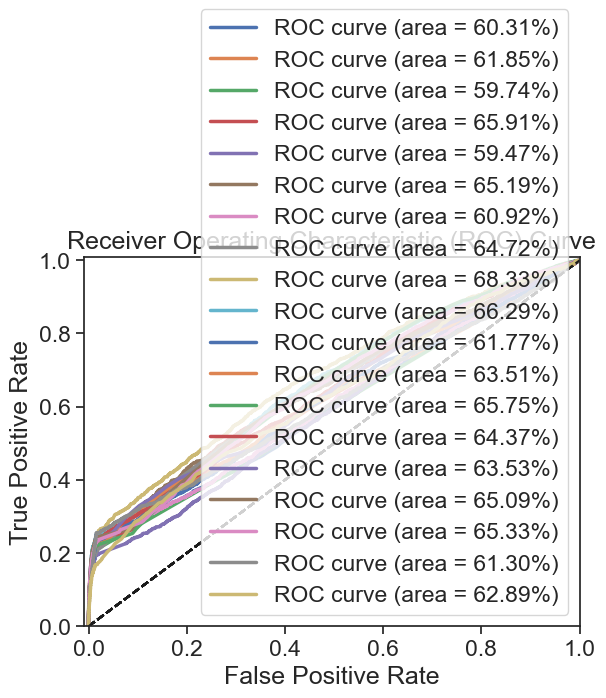

In [41]:
X_train_cv, y_train_cv,X_test, y_test , y_proba, df_total, y_pred, features_selected, param, model = cv_12months(df_200k, LR, random_undersampling)   # Taking too long... What about removing all subcategory columns with all values 0?

## Recommendation System - Top 20 Subcategories for each Customer in the month of November

- We should adapt the fact that the function does this to November so it can work for any month/iteration

In [ ]:
#aggregate the results of y_proba in tuples of 2
y_proba = y_proba.reshape(int(y_proba.shape[0]/2), 2)

In [ ]:
df_total['PROBABILITIES'] = y_proba.tolist()

In [ ]:
last_50_rows = y_proba[-50:]


In [ ]:
def recommend(df, y_proba, y_pred):

    y_pred_df = pd.DataFrame(y_pred)

    y_proba = y_proba[-df_total.shape[0]:]

    df_total['PROBABILITIES'] = y_proba.tolist()
    
    df_id_subcat = df.groupby('fulldate').sample(frac=0.2, random_state=101)


    numerical_columns = ['CUST_NUM_TRANSACTIONS_30_DAYS', 'CUST_NUM_TRANSACTIONS_90_DAYS',
       'CUST_NUM_TRANSACTIONS_180_DAYS', 'CUST_NUM_TRANSACTIONS_360_DAYS',
       'CUST_NUM_UNIQUE_SUBCAT_30_DAYS', 'CUST_NUM_UNIQUE_SUBCAT_90_DAYS',
       'CUST_NUM_UNIQUE_SUBCAT_180_DAYS', 'CUST_NUM_UNIQUE_SUBCAT_360_DAYS',
       'CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_30_DAYS',
       'CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_90_DAYS',
       'CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_180_DAYS',
       'CUST_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS',
       'CUST_AVG_BASKET_SIZE_30_DAYS', 'CUST_AVG_BASKET_SIZE_90_DAYS',
       'CUST_AVG_BASKET_SIZE_180_DAYS', 'CUST_AVG_BASKET_SIZE_360_DAYS',
       'SUBCAT_NUM_TRANSACTIONS_30_DAYS', 'SUBCAT_NUM_TRANSACTIONS_90_DAYS',
       'SUBCAT_NUM_TRANSACTIONS_180_DAYS', 'SUBCAT_NUM_TRANSACTIONS_360_DAYS',
       'SUBCAT_NUM_UNIQUE_CUST_30_DAYS', 'SUBCAT_NUM_UNIQUE_CUST_90_DAYS',
       'SUBCAT_NUM_UNIQUE_CUST_180_DAYS', 'SUBCAT_NUM_UNIQUE_CUST_360_DAYS',
       'CUSTSUBCAT_NUM_TRANSACTIONS_30_DAYS',
       'CUSTSUBCAT_NUM_TRANSACTIONS_90_DAYS',
       'CUSTSUBCAT_NUM_TRANSACTIONS_180_DAYS',
       'CUSTSUBCAT_NUM_TRANSACTIONS_360_DAYS',
       'CUSTSUBCAT_AVG_DAYS_FOR_NEXT_TRANSACTION_30_DAYS',
       'CUSTSUBCAT_AVG_DAYS_FOR_NEXT_TRANSACTION_90_DAYS',
       'CUSTSUBCAT_AVG_DAYS_FOR_NEXT_TRANSACTION_180_DAYS',
       'CUSTSUBCAT_AVG_DAYS_FOR_NEXT_TRANSACTION_360_DAYS']

    scaler = MinMaxScaler()
    df_id_subcat[numerical_columns] = scaler.fit_transform(df_id_subcat[numerical_columns])


    df_id_subcat = df_id_subcat.drop(columns=['QUARTER','SEMESTER','CAT_CD_EXT','SEG_LIFESTYLE_CD'])


    df_id_subcat = pd.get_dummies(df_id_subcat, columns=['GENDER','SEG_LIFESTAGE_CD','MONTH', 'YEAR', 'FAMILY_MEMBERS'])

    timestamps = df_id_subcat['fulldate'].sort_values().unique()

    aux_df = pd.DataFrame()



    for ts in timestamps[:-3]:
        if ts + 13 > timestamps.max():
            break
        else:
            test_ids = df_id_subcat[df_id_subcat['fulldate'] == ts+3]
            X_test = test_ids.drop(['TARGET', 'fulldate'], axis=1)

            X_test_pandas = pd.DataFrame(X_test, columns=X_test.columns)

            aux_df = aux_df.append(X_test_pandas)

    id_subcat = aux_df[['CUSTOMER_ACCOUNT_NR_MASK', 'SUBCAT_CD_EXT']]

    dataframe_ids = df_total.join(id_subcat)

    df_ids_probs = dataframe_ids[['CUSTOMER_ACCOUNT_NR_MASK', 'SUBCAT_CD_EXT', 'PROBABILITIES']]

    df_ids_probs['No Buy'] = df_ids_probs['PROBABILITIES'].apply(lambda x: x[0])
    df_ids_probs['Buy'] = df_ids_probs['PROBABILITIES'].apply(lambda x: x[1])

    df_ids_wo_probs = df_ids_probs.drop(columns = ['PROBABILITIES'])

    shape_y_pred = y_pred.shape[0]

    last_n_lines = df_ids_wo_probs.tail(shape_y_pred)

    #top_subcategories = last_n_lines.groupby('CUSTOMER_ACCOUNT_NR_MASK').apply(lambda x: x.nlargest(20, 'Second_Value'))
   
    last_n_lines = last_n_lines.reset_index()
    df_merged = last_n_lines.merge(y_pred_df, left_index=True, right_index=True)

    df_merged= df_merged.drop(columns = ['No Buy'])

    df_last3months = df_merged.groupby('CUSTOMER_ACCOUNT_NR_MASK').apply(lambda x: x.sort_values(by='Buy', ascending=False))

    recs= df_last3months[df_last3months[0] == 1]

    return recs    

In [ ]:
df.columns

In [ ]:
dftesting = recommend(df, y_proba, y_pred)

In [ ]:
dftesting

## Deployment

December 2022 does not have the TARGET value. Using the best model/setup used for training, the TARGET value is predicted

- Adapt the get_results function to the new format of the dataframe
- Adapt the CV function to the new format of the dataframe
- Adapt the recommend function to the new format of the dataframe

In [42]:
timestamps_testing = df_200k['fulldate'].sort_values().unique()

#select data from df_200k where full date is the last 3 months
X_test_deploy = df_200k[df_200k['fulldate'] >= timestamps_testing[-1]]
X_test_deploy = X_test_deploy.drop(columns=['TARGET', 'fulldate'])

#select data from df_200k where full date is the second to last month and the third to last month
last_3months = df_200k[(df_200k['fulldate'] >= timestamps_testing[-4]) & (df_200k['fulldate'] < timestamps_testing[-1])]

#split last_3months into X_train and y_train
X_train_deploy = last_3months.drop(columns=['TARGET', 'fulldate'])
y_train_deploy = last_3months['TARGET']

In [43]:
def deployment(df):

    ### Get the model from the file .joblib
    model = joblib.load('LR.joblib')

    #select the selected_features from the df
    df = df[features_selected]
    
    result = model.predict(df)
    return result

In [44]:
predicted = deployment(X_test_deploy)

In [45]:
#compare predicted shape with X_test_deploy shape
predicted.shape[0] == X_test_deploy.shape[0]

True

In [46]:
#select predicted where value is 1
number_of_1 = predicted[predicted == 1].shape
number_of_0 = predicted[predicted == 0].shape

print(f'Number of recommended "buys" for Dec.2022: {number_of_1[0]}')
print(f'Number of recommended "no buys for Dec.2022: {number_of_0[0]}')

Number of recommended "buys" for Dec.2022: 1925
Number of recommended "no buys for Dec.2022: 74613
